# N-TIDIGITS : Data Visualization 

In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import h5py
sys.path.append('../Processor')
from data_processor import SpeechDigitsDataset
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
# Put the path of the dataset here (available at http://sensors.ini.uzh.ch/databases.html)
data_root = r"C:\Users\hachi\Documents\Centrale 3A\EDC18\s2net_das"
train_dataset = SpeechDigitsDataset(data_root, transform = None, mode="train")
test_dataset = SpeechDigitsDataset(data_root, transform = None, mode="test")

## Timestamps vs addresses

In [3]:
def plot_timestamp_address(idx, mode):
    if isinstance(idx, list):
        for i in idx:
            plot_timestamp_address(i, mode)
        return
    
    item, digits_label = eval(mode + "_dataset")[idx]
    label =  eval(mode + "_dataset").labels[idx]
  
    plt.figure(figsize = (10, 5))
    plt.scatter(item.T[1], item.T[0], s=5)
    plt.title(str(label)[2:-1])
    plt.xlabel('Time (s)')
    plt.ylabel('Addresses')

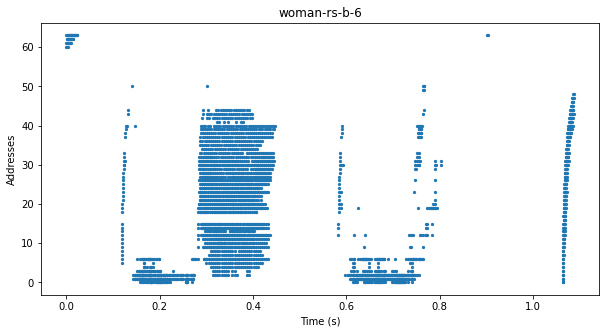

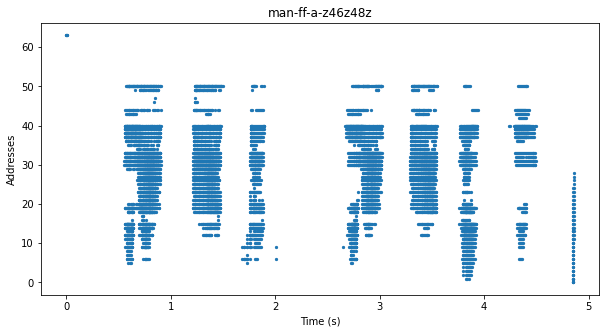

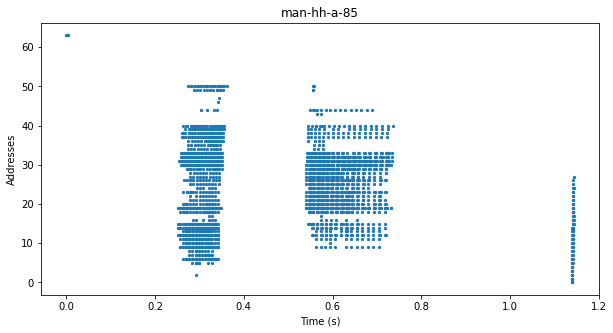

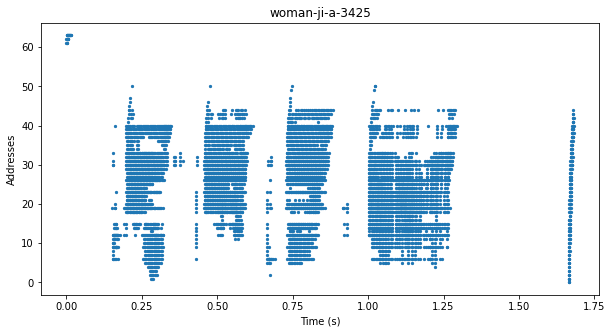

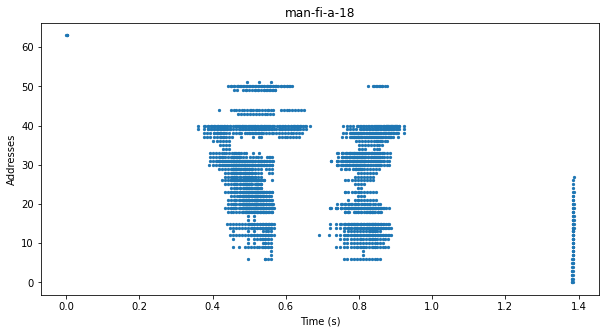

In [4]:
# We plot random recordings
mode = "train"
limit = eval(mode + "_dataset").__len__()
list_idx = list(np.random.randint(limit, size=5))
plot_timestamp_address(list_idx, mode)

## Stats on data

In [5]:
def data_stats(labels):
    digits_values = {}
    nb_digits_per_recording = {}
    genders = {}
    speakers = {}
    samples = {}
    for label in labels:
        label_info = SpeechDigitsDataset.get_label_info(label)
        digits = label_info[3]
        for digit in digits:
            if digit not in digits_values:
                digits_values[digit] = 1
            else :
                digits_values[digit]+= 1
        if len(digits) not in nb_digits_per_recording:
            nb_digits_per_recording[len(digits)] = 1
        else :
            nb_digits_per_recording[len(digits)]+= 1
        
        gender = label_info[0]
        if gender not in genders:
            genders[gender] = 1
        else :
            genders[gender]+= 1
            
        speaker = label_info[1]
        if speaker not in speakers:
            speakers[speaker] = 1
        else :
            speakers[speaker]+= 1
            
        sample = label_info[2]
        if sample not in samples:
            samples[sample] = 1
        else :
            samples[sample]+= 1
        
    return digits_values, nb_digits_per_recording, genders, speakers, samples

In [6]:
def plot_stats(labels):
    digits_values, nb_digits_per_recording, genders, speakers, samples = data_stats(labels)
    print("Dataset size = ", len(labels))
    print("Occurences of digits in the recordings = ", digits_values)
    print("Occurences of recordings lengths = ", nb_digits_per_recording)
    print("Number of recordings for each gender =", genders)
    print("Number of recordings for each sample =", samples)
    
    plt.figure(figsize = (10, 5))
    pos = np.arange(len(digits_values.keys()))
    width = 0.25     # gives histogram aspect to the bar diagram
    ax = plt.axes()
    ax.set_xticks(pos)
    ax.set_xticklabels(digits_values.keys())
    plt.bar(digits_values.keys(), digits_values.values(), width)
    plt.xlabel("digits")
    plt.ylabel("occurences in the recordings")
    plt.title("Occurences of digits in the recordings")
    for i, v in enumerate(digits_values.values()):
        plt.text(i-.25, v + 40, str(v), color='blue', fontweight='bold')

    plt.figure(figsize = (10, 5))
    width = 0.25
    ax = plt.axes()
    keys = list(nb_digits_per_recording.keys())
    keys.sort()
    pos = np.array(keys)
    values = [nb_digits_per_recording[key] for key in keys]
    ax.set_xticks(pos)
    ax.set_xticklabels(keys)
    plt.bar(keys, values, width)
    plt.xlabel("number of digits in the sequence")
    plt.ylabel("number of recordings")
    plt.title("Occurences of recordings lengths")
    for i, v in enumerate(values):
        plt.text(keys[i]-.2, v + 40, str(v), color='blue', fontweight='bold')

    plt.figure(figsize = (10, 5))
    pos = np.arange(len(genders.keys()))
    width = 0.25
    ax = plt.axes()
    ax.set_xticks(pos)
    ax.set_xticklabels(genders.keys())
    plt.bar(genders.keys(), genders.values(), width)
    plt.xlabel("genders")
    plt.ylabel("number of recordings")
    plt.title("Number of recordings for each gender")
    for i, v in enumerate(genders.values()):
        plt.text(i-.03, v + 40, str(v), color='blue', fontweight='bold')

    plt.figure(figsize = (10, 5))
    pos = np.arange(len(samples.keys()))
    width = 0.25
    ax = plt.axes()
    ax.set_xticks(pos)
    ax.set_xticklabels(list(samples.keys())[::-1])
    plt.bar(list(samples.keys())[::-1], list(samples.values())[::-1], width)
    plt.xlabel("samples")
    plt.ylabel("number of recordings")
    plt.title("Number of recordings for each sample")
    for i, v in enumerate(list(samples.values())[::-1]):
        plt.text(i-.03, v + 40, str(v), color='blue', fontweight='bold')

##### Training data

Dataset size =  8621
Occurences of digits in the recordings =  {'6': 2596, '9': 2545, 'o': 2568, '8': 2567, '4': 2582, '3': 2577, '5': 2545, '1': 2593, '2': 2586, 'z': 2590, '7': 2574}
Occurences of recordings lengths =  {1: 2463, 4: 1232, 5: 1231, 3: 1232, 7: 1231, 2: 1232}
Number of recordings for each gender = {'man': 4235, 'woman': 4386}
Number of recordings for each sample = {'b': 1249, 'a': 7372}


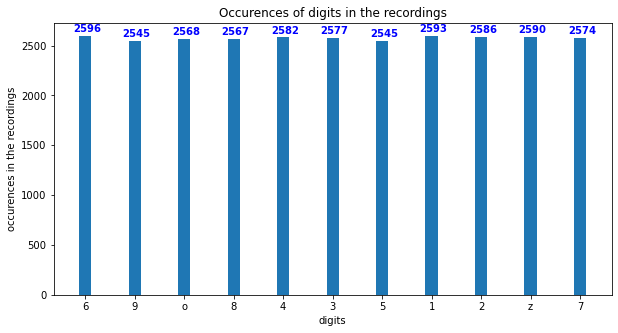

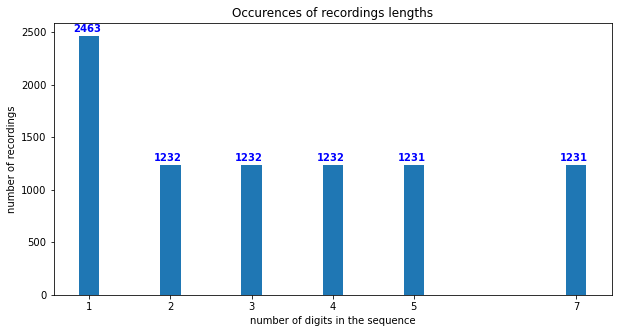

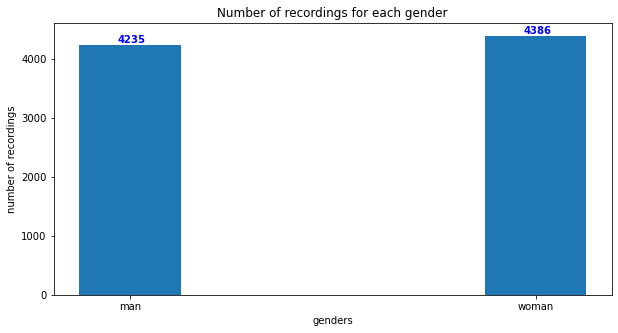

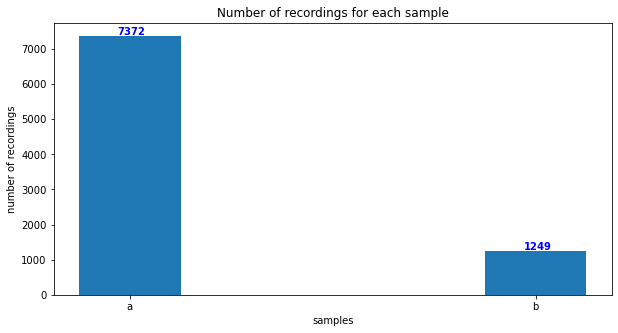

In [7]:
plot_stats(train_dataset.labels)

##### Test data

Dataset size =  8697
Occurences of digits in the recordings =  {'6': 2609, '9': 2561, '7': 2600, '5': 2597, '4': 2599, 'z': 2608, '3': 2606, '2': 2625, '1': 2600, 'o': 2555, '8': 2613}
Occurences of recordings lengths =  {1: 2486, 2: 1242, 4: 1242, 7: 1242, 5: 1243, 3: 1242}
Number of recordings for each gender = {'man': 4310, 'woman': 4387}
Number of recordings for each sample = {'b': 1269, 'a': 7428}


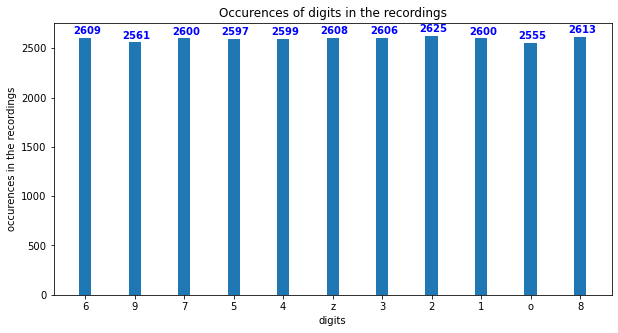

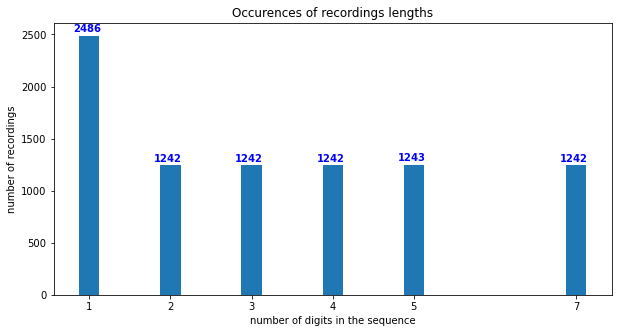

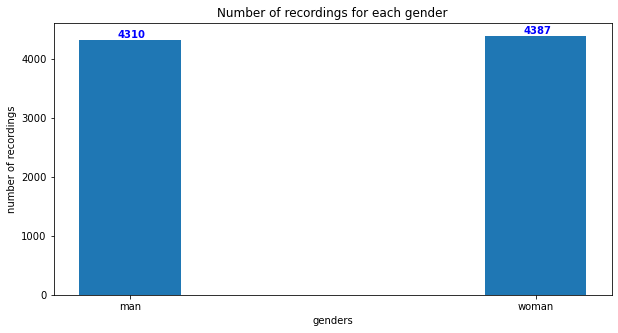

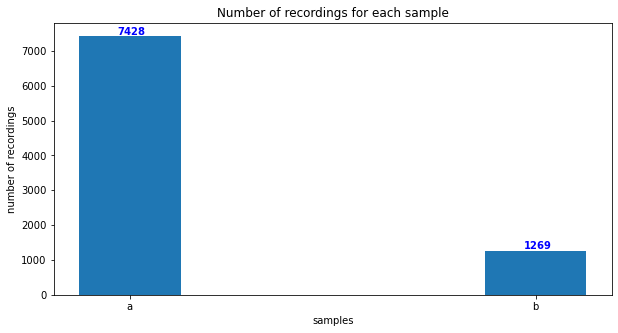

In [10]:
plot_stats(test_dataset.labels)